In [17]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [9]:
aggregation = 7
limit = 100

url = 'https://min-api.cryptocompare.com'
req = f'/data/v2/histoday?fsym=BTC&aggregate={aggregation}&tsym=USD&limit={limit}'
parameters = {
    'extraParams': 'cryptoStockChart',
}
headers = {
  'Accepts': 'application/json',
  'Apikey': '7832da29e85039a8db58851b5863f9b559966e19e34dcc48fbbe9110d55a0f9d',
}

In [10]:
session = Session()
session.headers.update(headers)

In [11]:
try:
  response = session.get(url+req, params=parameters)
  data = json.loads(response.text)
  print(data['Data']['Data'])
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


[{'time': 1556755200, 'high': 6032.25, 'low': 5387.29, 'open': 5389.54, 'volumefrom': 317138.27, 'volumeto': 1830921801.78, 'close': 5998.71, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1557360000, 'high': 8297.02, 'low': 5988.65, 'open': 5998.71, 'volumefrom': 754934.32, 'volumeto': 5507684239.91, 'close': 8183.83, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1557964800, 'high': 8352.25, 'low': 6668.67, 'open': 8183.83, 'volumefrom': 549265.2, 'volumeto': 4232317700.15, 'close': 7626.89, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1558569600, 'high': 8931.53, 'low': 7478.74, 'open': 7626.89, 'volumefrom': 324862.83, 'volumeto': 2711059953.13, 'close': 8664.56, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1559174400, 'high': 9065.89, 'low': 7463.94, 'open': 8664.56, 'volumefrom': 424533.28, 'volumeto': 3500241739.7, 'close': 7791.29, 'conversionType': 'direct', 'conversionSymbol': ''}, {'time': 1559779200, 'high': 82

In [12]:
import pandas as pd
df = pd.DataFrame()

In [13]:
from datetime import datetime
for row in data['Data']['Data']:
    df = df.append({
        'date': datetime.fromtimestamp(row['time']).strftime('%Y-%m-%d'),
        'price': row['close']
    }, ignore_index = True)

In [14]:
df

,date,price
0,2019-05-02,5998.71
1,2019-05-09,8183.83
2,2019-05-16,7626.89
3,2019-05-23,8664.56
4,2019-05-30,7791.29
...,...,...
96,2021-03-04,55893.31
97,2021-03-11,58909.00
98,2021-03-18,52303.02
99,2021-03-25,58793.80


[['2019-05-02' 5998.71]
 ['2019-05-09' 8183.83]
 ['2019-05-16' 7626.89]
 ['2019-05-23' 8664.56]
 ['2019-05-30' 7791.29]
 ['2019-06-06' 8174.14]
 ['2019-06-13' 9280.54]
 ['2019-06-20' 12913.28]
 ['2019-06-27' 11981.61]
 ['2019-07-04' 12099.12]
 ['2019-07-11' 9696.15]
 ['2019-07-18' 9772.14]
 ['2019-07-25' 10089.25]
 ['2019-08-01' 11974.28]
 ['2019-08-08' 10031.89]
 ['2019-08-15' 10131.67]
 ['2019-08-22' 9722.83]
 ['2019-08-29' 10585.2]
 ['2019-09-05' 10165.01]
 ['2019-09-12' 10163.38]
 ['2019-09-19' 8446.97]
 ['2019-09-26' 8391.52]
 ['2019-10-03' 8593.16]
 ['2019-10-10' 8014.39]
 ['2019-10-17' 7479.54]
 ['2019-10-24' 9169.86]
 ['2019-10-31' 9347.27]
 ['2019-11-07' 8773.82]
 ['2019-11-14' 8093.6]
 ['2019-11-21' 7531.5]
 ['2019-11-28' 7207.78]
 ['2019-12-05' 7212.01]
 ['2019-12-12' 7294.53]
 ['2019-12-19' 7202.72]
 ['2019-12-26' 7189.94]
 ['2020-01-02' 8045.15]
 ['2020-01-09' 8813.21]
 ['2020-01-16' 8667.26]
 ['2020-01-23' 9286.18]
 ['2020-01-30' 9611.42]
 ['2020-02-06' 10347.93]
 ['2020-

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

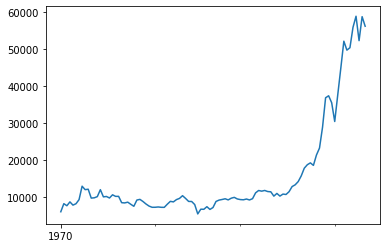

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
x = df['date']
y = df['price']

data = df.to_numpy()

print(data)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot('date', 'price', data=df)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [25]:
from StockHistory import StockHistory
sh = StockHistory()
history = sh.load_data("ETH", 1, "PLN", "365")

<AxesSubplot:>

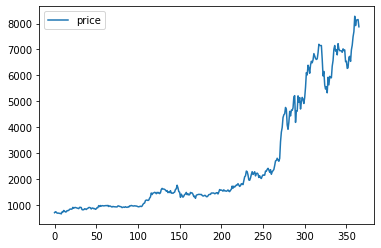

In [28]:
history.plot()
